# 회귀분석
(경제학에서는) 경제학에서 의미를 가지는 데이터를 '종속변수 (dependent variable)'로 설정하고, '종속변수'를 설명할 수 있는 '독립변수 (independent variable)'를 이용하여 변수들 간의 관계를 통계적으로 추정하는 분석방법.
- 회귀분석을 하는 이유는 '경제학적 질문'으로 부터.
- 회귀분석을 시작하려면, 질문을 분석해 볼 데이터가 있는가?
    - '독립변수'는 '종속변수'의 '경제적 질문'과 연결되어 있어야 함.
- '질문'과 '데이터'가 준비되어 있다면, OLS 분석방법을 시도해 보자.
- OLS의 강력한 장점들
    - 모델이 다음과 같을 때,
        - $ \begin{equation} Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_K X_K + u \nonumber \end{equation}$
    - 두가지 조건만 만족하면, 추정치를 구할 수 있음  
        - OLS.1: $ E(X'u)=0 $
        - OLS.2: $ rank \, E(X'X)=K $
    - 계산법이 간단함. 추정치 $\hat{\beta}$,  
    $ \hat{\beta} = (X'X)^{-1}X'Y $
    - 간단한 모델링과 계산법으로 인해, 결과해석이 간단함 (사칙연산).  
    $ \hat{Y} = E[Y|X]= X\hat{\beta} $
    - 모델이 적합한지 확인 할 수 있는 방법이 존재.
        - 모델의 설명력의 존재 유무 테스트: Wald test, F-test, R-squared
        - 모델의 적합도 측정: RMSE
        - 추정치의 통계적 의미: t-statistics
    - 모델에 따라 개선방법들이 많이 연구되어 있음.

## OLS (Ordinary Least Square); 단순회귀분석

교육서비스를 제공해야 하나?

- 교육서비스와 소득에 경제학적 접근
    - 교육에 투자해야 할 이유
        - 개인의 경우 소득.
        - 정부의 경우 미래 세금 수입.
    - 얼마나 많은 교육 서비스를 제공 할 지
        - 유한한 자원; 서비스 비용의 증가.
        - 효율적인 자원분배; 복지나 인프라에 투자 가능.


1. '종속변수'와 '독립변수'의 관계를 수식으로 표현하기  
$\begin{align}
\ln({earnings}) = \beta_{intercept} + \beta_{school} {school} + \varepsilon \nonumber
\end{align}$
1. 그래프로 데이터 이해하기
![fig_3_1_2](https://github.com/SeanJSLee/Teaching_YU_DS_basic_KR/blob/main/doc/img/Figure_3_1_1.png?raw=true)
1. OLS 실행하고 분석하기
![fig_3_1_3_a](https://github.com/SeanJSLee/Teaching_YU_DS_basic_KR/blob/main/doc/img/Figure_3_1_3_a.png?raw=true)
    - 추정결과  
    $\begin{align}
    E[\ln({earnings})|{school}] = 5.835761 + 0.0674387 \cdot {school} \nonumber
    \end{align}$
        - 대학졸업자의 일주일 평균 급여: $ e^{E[ln(earning)|school=16]} = e^{5.835761 + 0.0674387 \cdot 16} = e^{6.9147802} \sim 1007.05 $
        - 고등학교 졸업자의 일주일 평균 급여: $ e^{E[ln(earning)|school=12]} = e^{5.835761 + 0.0674387 \cdot 12} = e^{6.6450254} \sim 768.95 $
        - 추정값이 의미가 있는 지 확인하기
            - 관측치가 40만개가량이며, t-statistics가 2 이상이기 떄문에, 95% 이상의 관측치들이 0보다 큰 영향을 가지고 있음. 통계적으로 의미가 있음.
            - F-test 결과도 0으로 수렴하기 때문에, 모델은 설명력이 존재.
            - Adjusted $R^2$ 0.107은 상당한 설명력을 보여줌
            <!-- - 표준오차(standard error): 표준편차랑 거의 같음 -->
<!-- ![normal dist](https://currentprotocols.onlinelibrary.wiley.com/cms/asset/d39ab523-dfbe-4589-89ab-28afcbc9e0c1/cpz1801-fig-0005-m.jpg)   -->

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import patsy
import matplotlib.pyplot as plt

# 소수점 설정
pd.options.display.float_format = "{:,.3f}".format

# Load the dataset
df_cps = pd.read_csv("https://raw.githubusercontent.com/SeanJSLee/Teaching_YU_DS_basic_KR/main/data/Dehejia_and_Wahba_1999/data_cps78_income.csv")
df_cps

,Unnamed: 0,income_78,edu_year,age,edu_level,income_at_23,ln_income_at_23
0,0,"9,930.046",11,37,Secondary,"46,406.210",10.745
1,1,"3,595.894",9,22,Secondary,"16,804.736",9.729
2,2,"24,909.450",12,30,Secondary,"116,409.640",11.665
3,3,"7,506.146",11,27,Secondary,"35,078.566",10.465
4,4,289.790,8,33,Secondary,"1,354.279",7.211
...,...,...,...,...,...,...,...
13955,13955,"2,757.438",12,22,Secondary,"12,886.370",9.464
13956,13956,"6,895.072",12,20,Secondary,"32,222.826",10.380
13957,13957,"4,221.865",12,37,Secondary,"19,730.096",9.890
13958,13958,"13,671.930",9,47,Secondary,"63,893.203",11.065


In [2]:
y_cps,X_cps = patsy.dmatrices('ln_income_at_23 ~ edu_year', data=df_cps, return_type='dataframe')

# Fit the OLS model
model_cps = sm.OLS(y_cps,X_cps)
result_cps = model_cps.fit(cov_type='HC0')

# Print the model summary
result_cps.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_income_at_23   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     245.4
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           7.49e-55
Time:                        13:44:26   Log-Likelihood:                -19164.
No. Observations:               13960   AIC:                         3.833e+04
Df Residuals:                   13958   BIC:                         3.835e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4906      0.036    292.881      0.000      10.420      10.561
edu_year       0.0450      0.003     15.667      0.000       0.039       0.051
==============================================================================
Omnibus:                     7880.097   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68169.419
Skew:                          -2.627   Prob(JB):                         0.00
Kurtosis:                      12.465   Cond. No.                         53.5
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

Total observation:13960 
95% observation are in [9.14, 12.92] 
	number of observation: 13960, 100.00%


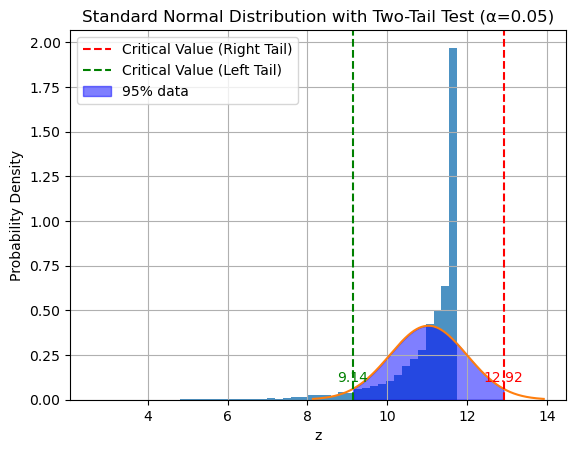

In [3]:
def draw_dist(data, alpha) :
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats as stats
    mu = np.nanmean(data)
    sigma = np.nanstd(data)
    n = len(data[~np.isnan(data)])
    # Alpha level for two-tailed test
    # alpha = 0.05
    # 
    fig, ax = plt.subplots()
    ax.hist(data, bins=min(round(np.sqrt(n)),50), density=True, alpha=0.8)
    # Generate points on the x axis
    x = np.linspace((mu-3*sigma), (mu+3*sigma), 1000)
    # Calculate the normal distribution's PDF at these points:
    y = stats.norm.pdf(x, mu, sigma)
    ax.plot(x, y)
    # Critical values for two-tailed test at alpha level
    critical_value_right = mu + stats.norm.ppf(1 - alpha / 2) * sigma
    critical_value_left  = mu + stats.norm.ppf(alpha / 2) * sigma
    # Plot the critical values
    ax.axvline(critical_value_right, color='r', linestyle='--', label='Critical Value (Right Tail)')
    ax.axvline(critical_value_left, color='g', linestyle='--', label='Critical Value (Left Tail)')
    # Labeling the critical values
    ax.text(critical_value_right, 0.1, f'{critical_value_right:.2f}', horizontalalignment='center', color='red')
    ax.text(critical_value_left, 0.1, f'{critical_value_left:.2f}', horizontalalignment='center', color='green')
    # Fill between for the two-tail areas
    ax.fill_between(x, y, where=(x > critical_value_left) & (x < critical_value_right), 
    color='blue', alpha=0.5, label=f'{(1-alpha):.00%} data')
    print(f'Total observation:{n} \n95% observation are in [{critical_value_left:.2f}, {critical_value_right:.2f}] \n\tnumber of observation: {len(data[(data>=critical_value_left)&(data<=critical_value_right)])}, {len(data[(data>=critical_value_left)&(data<=critical_value_right)])/len(data):.2%}')
    plt.xlabel('z')
    plt.ylabel('Probability Density')
    plt.title('Standard Normal Distribution with Two-Tail Test (α={alpha})'.format(alpha=alpha))
    plt.legend()
    plt.grid(True)
    plt.show()


alpha = 0.05
draw_dist(y_cps, alpha)

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import patsy
import matplotlib.pyplot as plt

# Load the dataset
df_hps = pd.read_csv("https://raw.githubusercontent.com/SeanJSLee/Teaching_YU_DS_basic_KR/main/data/KOSIS_houshold_panel_survey/data_income_kor.csv")
df_hps

,Unnamed: 0,date,id,household,female,age,income,edu_year,ln_income
0,0,2023-03-01,1,True,False,43.000,"5,170,000.000",12,15.458
1,1,2023-03-01,2,True,False,66.000,"2,176,800.000",9,14.593
2,2,2023-03-01,4,True,True,50.000,"2,078,090.000",12,14.547
3,3,2023-03-01,5,True,False,30.000,"700,514.000",14,13.460
4,4,2023-03-01,6,True,True,65.000,"895,976.000",12,13.706
...,...,...,...,...,...,...,...,...,...
22052,22052,2023-12-01,7109,False,True,39.000,"2,500,000.000",16,14.732
22053,22053,2023-12-01,7114,False,True,51.000,"2,292,890.000",12,14.645
22054,22054,2023-12-01,7118,False,True,39.000,"135,000.000",16,11.813
22055,22055,2023-12-01,7124,False,True,77.000,"270,000.000",6,12.506


Total observation:22057 
95% observation are in [12.51, 16.67] 
	number of observation: 22057, 100.00%


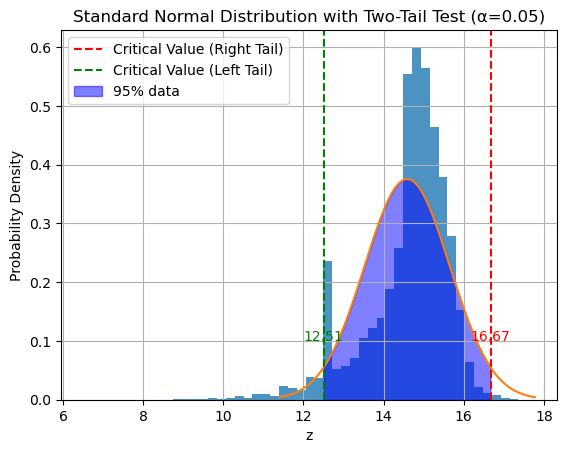

In [5]:
y,X = patsy.dmatrices('ln_income ~ edu_year', data=df_hps, return_type='dataframe')

alpha = 0.05
draw_dist(y, alpha)

In [6]:
# Fit the OLS model
model = sm.OLS(y, X)
result = model.fit(cov_type='HC0')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln_income   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     7854.
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:44:27   Log-Likelihood:                -28789.
No. Observations:               22057   AIC:                         5.758e+04
Df Residuals:                   22055   BIC:                         5.760e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5089      0.025    495.433      0.000      12.459      12.558
edu_year       0.1591      0.002     88.623      0.000       0.156       0.163
==============================================================================
Omnibus:                     6968.947   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29732.713
Skew:                          -1.505   Prob(JB):                         0.00
Kurtosis:                       7.826   Cond. No.                         51.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

[statsmodels.regression.linear_model.OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html)

In [7]:
# 관축치
result.nobs

22057.0

 * Wald test [res.wald_test()](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.wald_test.html)  
 follows k DoF Chi-squared distribution. [critical value table](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm)

In [8]:
result.wald_test(result.params.index.to_list(), use_f=False, scalar=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=6174199.144142043, p-value=0.0, df_denom=2>

In [9]:
from scipy.stats import chi2
chi2.ppf(.99,df=2)

9.21034037197618

In [10]:
# 추정치
result.params

Intercept   12.509
edu_year     0.159
dtype: float64

In [11]:
# Standard Error
result.bse

Intercept   0.025
edu_year    0.002
dtype: float64

In [12]:
# t-statistic
result.tvalues

Intercept   495.433
edu_year     88.623
dtype: float64

In [13]:
# p-value
result.pvalues

Intercept   0.000
edu_year    0.000
dtype: float64

In [14]:
# confidence inverval
result.conf_int()

,0,1
Intercept,12.459,12.558
edu_year,0.156,0.163


In [15]:
# adjusted R-squared
result.rsquared_adj

0.2941239971943721

In [16]:
# RMSE; root mean squred error
result.mse_resid**.5

0.892534652476287

In [17]:
# 
est_beta_intercept = result.params['Intercept']
est_beta_intercept

12.508918006111662

In [18]:
est_beta_school = result.params['edu_year']
est_beta_school

0.1590793652629975

In [19]:
# 대학졸업자 월평균 임금
np.exp(est_beta_intercept + est_beta_school * 16)

3451045.7199773034

In [20]:
# 고등학교졸업자 월평균 임금
np.exp(est_beta_intercept + est_beta_school * 12)

1826423.7708783718

행렬연산으로 추정치 구해보기 $ \hat{\beta} = (X'X)^{-1}X'Y $

In [21]:
mat_x = np.matrix(X)
mat_y = np.matrix(y)

xTx = mat_x.T * mat_x
xTx_inv = np.linalg.inv(xTx)
xTy = mat_x.T * mat_y

beta_hat = xTx_inv * xTy
print('beta :',beta_hat, '\nbeta 0:',beta_hat[0], '\nbeta 1:',beta_hat[1])

beta : [[12.50891801]
 [ 0.15907937]] 
beta 0: [[12.50891801]] 
beta 1: [[0.15907937]]


### OLS 결과 분석

#### 추정치를 그래프로 표현해보기
교육연도에 따른 임금변화율을 그래프로 표현

In [77]:
# fig, ax = plt.subplots()
# ax.scatter(x=result.predict(), y=df_hps['ln_income'], alpha=0.1, s=5, marker='D', c='b')

# # plt.legend(['CEF', 'Fitted', 'Actual'])
# plt.show

In [22]:
# 관측치를 이용하여 교육연도별 임금평균
school_means = df_hps.groupby('edu_year')['ln_income'].mean()
school_means

edu_year
0    12.704
6    13.221
9    13.857
12   14.509
14   14.756
16   15.054
18   15.156
21   15.573
Name: ln_income, dtype: float64

In [23]:
result.predict(sm.add_constant(range(0,22)))


array([12.50891801, 12.66799737, 12.82707674, 12.9861561 , 13.14523547,
       13.30431483, 13.4633942 , 13.62247356, 13.78155293, 13.94063229,
       14.09971166, 14.25879102, 14.41787039, 14.57694975, 14.73602912,
       14.89510849, 15.05418785, 15.21326722, 15.37234658, 15.53142595,
       15.69050531, 15.84958468])

<function matplotlib.pyplot.show(close=None, block=None)>

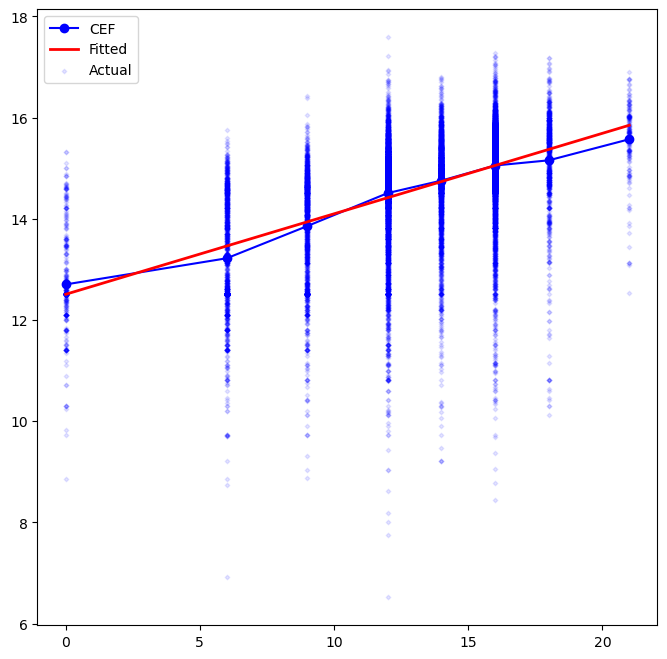

In [108]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(school_means, linestyle='-', marker='o', c='b')
ax.plot(result.predict(sm.add_constant(range(0,22))) ,linestyle='-', linewidth=2, c='r')
ax.scatter(df_hps['edu_year'], df_hps['ln_income'], alpha=0.1, s=5, marker='D', c='b')

plt.legend(['CEF', 'Fitted', 'Actual'])
plt.show

### Alternative specification
- 임금과 연관된 다른 변수 추가해보기 - 경력을 근사 할 수 있는 나이

In [61]:
def ols_alt_spec(spec, data):
    import statsmodels.api as sm
    import patsy
    y,X = patsy.dmatrices(spec, data=data, return_type='dataframe')
    model  = sm.OLS(y,X)
    result = model.fit(cov_type='HC0')
    print(result.summary())
    return result

result_alt_age = ols_alt_spec(spec='ln_income ~ edu_year + age', data= df_hps)

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     4727.
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:51:00   Log-Likelihood:                -28316.
No. Observations:               22057   AIC:                         5.664e+04
Df Residuals:                   22054   BIC:                         5.666e+04
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8046      0.054    255.500      0.0

In [62]:
result_alt_age_sq = ols_alt_spec(spec='ln_income ~ edu_year + age + np.power(age,2)', data= df_hps)

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     4475.
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:51:19   Log-Likelihood:                -26771.
No. Observations:               22057   AIC:                         5.355e+04
Df Residuals:                   22053   BIC:                         5.358e+04
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           11.1272      0.066  

In [71]:
print('model: original; RMSE=' , result.mse_resid ** .5)
print('model: alt(age); RMSE=' , result_alt_age.mse_resid ** .5)
print('model: alt(age, age^2); RMSE=' , result_alt_age_sq.mse_resid ** .5)


model: original; RMSE= 0.892534652476287
model: alt(age); RMSE= 0.873618866662106
model: alt(age, age^2); RMSE= 0.8145501283741318


In [98]:
# 교육연도별 임금평균 - alternative specification
CEF_income_edu = df_hps.groupby('edu_year')['ln_income'].mean()


df_to_predict_age = pd.DataFrame(columns=result_alt_age_sq.params.index)
# result_alt_age.predict()
df_to_predict_age['edu_year'] = range(0,22)
df_to_predict_age['Intercept'] = 1
df_to_predict_age['age'] = df_hps['age'].mean()
df_to_predict_age['np.power(age, 2)'] = df_hps['age'].mean() ** 2
df_to_predict_age
# 
# result_alt_age.predict(df_to_predict_age[result_alt_age.params.index])
df_to_predict_age


,Intercept,edu_year,age,"np.power(age, 2)"
0,1,0,50.880,"2,588.811"
1,1,1,50.880,"2,588.811"
2,1,2,50.880,"2,588.811"
3,1,3,50.880,"2,588.811"
4,1,4,50.880,"2,588.811"
5,1,5,50.880,"2,588.811"
6,1,6,50.880,"2,588.811"
7,1,7,50.880,"2,588.811"
8,1,8,50.880,"2,588.811"
9,1,9,50.880,"2,588.811"


<function matplotlib.pyplot.show(close=None, block=None)>

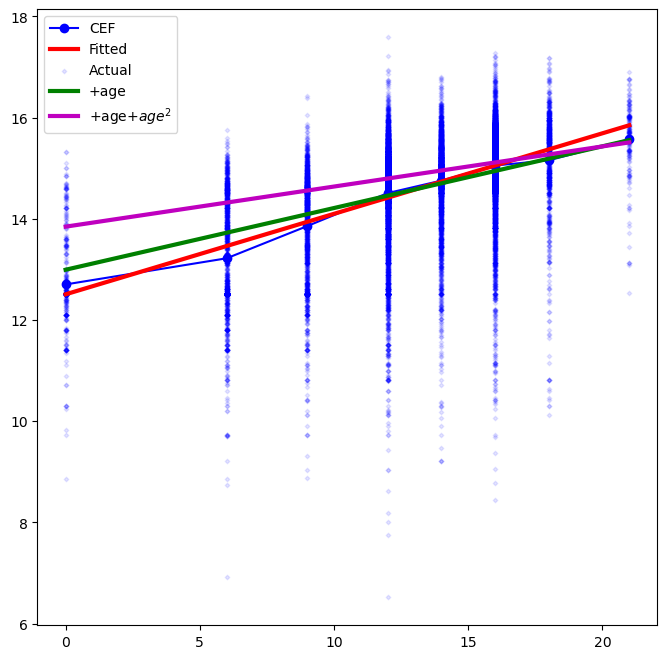

In [105]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(school_means, linestyle='-', marker='o', c='b')
ax.plot(result.predict(sm.add_constant(range(0,22))) ,linestyle='-', linewidth=3, c='r')
ax.scatter(df_hps['edu_year'], df_hps['ln_income'], alpha=0.1, s=5, marker='D', c='b')
# alt 1
ax.plot(result_alt_age.predict(df_to_predict_age[result_alt_age.params.index]) ,linestyle='-', linewidth=3, c='g')
# alt 2
ax.plot(result_alt_age_sq.predict(df_to_predict_age[result_alt_age_sq.params.index]) ,linestyle='-', linewidth=3, c='m')



plt.legend(['CEF', 'Fitted', 'Actual', '+age', '+age+$age^2$'])
plt.show

In [109]:
df_hps

,Unnamed: 0,date,id,household,female,age,income,edu_year,ln_income
0,0,2023-03-01,1,True,False,43.000,"5,170,000.000",12,15.458
1,1,2023-03-01,2,True,False,66.000,"2,176,800.000",9,14.593
2,2,2023-03-01,4,True,True,50.000,"2,078,090.000",12,14.547
3,3,2023-03-01,5,True,False,30.000,"700,514.000",14,13.460
4,4,2023-03-01,6,True,True,65.000,"895,976.000",12,13.706
...,...,...,...,...,...,...,...,...,...
22052,22052,2023-12-01,7109,False,True,39.000,"2,500,000.000",16,14.732
22053,22053,2023-12-01,7114,False,True,51.000,"2,292,890.000",12,14.645
22054,22054,2023-12-01,7118,False,True,39.000,"135,000.000",16,11.813
22055,22055,2023-12-01,7124,False,True,77.000,"270,000.000",6,12.506


In [115]:
ols_alt_spec(spec='ln_income ~ edu_year + age + np.power(age,2)', data= df_hps.loc[(df_hps['age'].isin(range(40,50))) & df_hps['female']==False])

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     4547.
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:30:46   Log-Likelihood:                -23795.
No. Observations:               19718   AIC:                         4.760e+04
Df Residuals:                   19714   BIC:                         4.763e+04
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.9703      0.067  

### OLS.1 가정이 성립하지 않을때
#### 시나리오 1: 1980 미국 평균 노동시간 42시간 vs 2023  

In [40]:
df_tt = df_hps[['income', 'edu_year']]
df_tt['ln_income_w'] = np.log(df_tt['income']/4)
result_alt_age = ols_alt_spec(spec='ln_income_w ~ edu_year', data= df_tt)

                            OLS Regression Results                            
Dep. Variable:            ln_income_w   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     7854.
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:44:28   Log-Likelihood:                -28789.
No. Observations:               22057   AIC:                         5.758e+04
Df Residuals:                   22055   BIC:                         5.760e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1226      0.025    440.527      0.0

C:\Users\SeanJ\AppData\Local\Temp\ipykernel_6296\1611864120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tt['ln_income_w'] = np.log(df_tt['income']/4)


In [41]:
df_tt = df_hps[['income', 'edu_year']]
df_tt['income_hour'] = df_tt.apply(lambda x : x['income'] * 0.8 if x['edu_year'] >= 12 else x['income'], axis=1)
df_tt['ln_income_hour'] = np.log(df_tt['income_hour'])
result_alt_age = ols_alt_spec(spec='ln_income_hour ~ edu_year', data= df_tt)

                            OLS Regression Results                            
Dep. Variable:         ln_income_hour   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     6265.
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:44:28   Log-Likelihood:                -28707.
No. Observations:               22057   AIC:                         5.742e+04
Df Residuals:                   22055   BIC:                         5.743e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5606      0.025    501.635      0.0

C:\Users\SeanJ\AppData\Local\Temp\ipykernel_6296\2812815708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tt['income_hour'] = df_tt.apply(lambda x : x['income'] * 0.8 if x['edu_year'] >= 12 else x['income'], axis=1)
C:\Users\SeanJ\AppData\Local\Temp\ipykernel_6296\2812815708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tt['ln_income_hour'] = np.log(df_tt['income_hour'])
